In [334]:
# Data Processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Model and Performance
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score
from imblearn.metrics import specificity_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from plot_metric.functions import BinaryClassification

In [215]:
import warnings
warnings.simplefilter("ignore")

In [216]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [218]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Encoding OneHot

In [219]:
data['month'] = pd.to_datetime(data.month, format='%b').dt.month

In [679]:
cat_features

,job,marital,education,default,housing,loan,contact,poutcome
0,unemployed,married,primary,no,no,no,cellular,unknown
1,services,married,secondary,no,yes,yes,cellular,failure
2,management,single,tertiary,no,yes,no,cellular,failure
3,management,married,tertiary,no,yes,yes,unknown,unknown
4,blue-collar,married,secondary,no,yes,no,unknown,unknown
...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,unknown
4517,self-employed,married,tertiary,yes,yes,yes,unknown,unknown
4518,technician,married,secondary,no,no,no,cellular,unknown
4519,blue-collar,married,secondary,no,no,no,cellular,other


In [220]:
num_feature_names = ['age','balance','day','month','duration','campaign','pdays','previous']
cat_feature_names = ['job','marital','education','default','housing','loan','contact','poutcome']

num_features = data[num_feature_names]
cat_features = data[cat_feature_names]

new_cat_features = pd.get_dummies(cat_features)
new_cat_features.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,1,0,0,0,1


In [221]:
#Concatenate of all features(X) after Encoding 
all_data = pd.concat([num_features,new_cat_features],axis=1)
all_data.head()

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,10,79,1,-1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
1,33,4789,11,5,220,1,339,4,0,0,...,1,0,1,1,0,0,1,0,0,0
2,35,1350,16,4,185,1,330,1,0,0,...,1,1,0,1,0,0,1,0,0,0
3,30,1476,3,6,199,4,-1,0,0,0,...,1,0,1,0,0,1,0,0,0,1
4,59,0,5,5,226,1,-1,0,0,1,...,1,1,0,0,0,1,0,0,0,1


In [222]:
target_output = data['y']
all_data['target_output'] = (data.y=='yes').astype('int')
all_data

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,target_output
0,30,1787,19,10,79,1,-1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,33,4789,11,5,220,1,339,4,0,0,...,0,1,1,0,0,1,0,0,0,0
2,35,1350,16,4,185,1,330,1,0,0,...,1,0,1,0,0,1,0,0,0,0
3,30,1476,3,6,199,4,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4,59,0,5,5,226,1,-1,0,0,1,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,7,329,5,-1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4517,57,-3313,9,5,153,1,-1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
4518,57,295,19,8,151,11,-1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4519,28,1137,6,2,129,4,211,3,0,1,...,1,0,1,0,0,0,1,0,0,0


### Spliting X and Y

In [641]:
no_cols = all_data.shape[1]
data_x = all_data.iloc[:, : no_cols -1 ] # delete last column (target output)
data_y = all_data.iloc[:, no_cols -1 :] # only last column

### Check imbalance before split data into training and testing 

In [642]:
all_data['target_output'].value_counts()

0    4000
1     521
Name: target_output, dtype: int64

In [643]:
all_data['target_output'].value_counts('0')

0    0.88476
1    0.11524
Name: target_output, dtype: float64

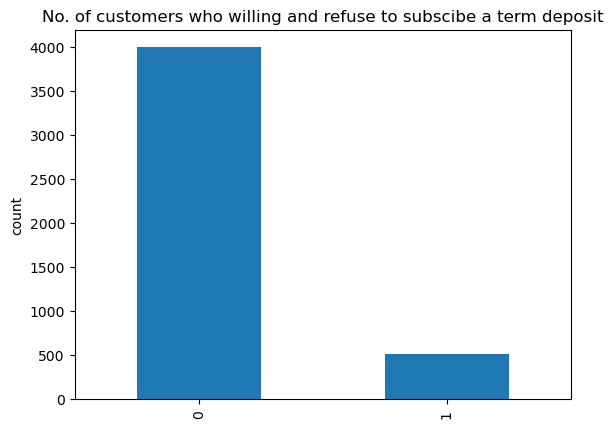

In [257]:
plt.figure()
all_data['target_output'].value_counts().plot(kind='bar')
plt.title('No. of customers who willing and refuse to subscibe a term deposit')
plt.ylabel('count')
plt.show()

### Normalized data 

In [359]:
scaler = StandardScaler()

In [360]:
X_numeric = data_x[data_x.columns[0:8]]
X_categorical = data_x.drop(data_x.columns[0:8],axis=1)

In [361]:
X_num_normalized = scaler.fit_transform(X_numeric)
X_num_normalized = pd.DataFrame(X_num_normalized,columns=X_numeric.columns)
X_num_normalized

,age,balance,day,month,duration,campaign,pdays,previous
0,-1.056270,0.121072,0.374052,1.611873,-0.711861,-0.576829,-0.407218,-0.320413
1,-0.772583,1.118644,-0.596026,-0.490631,-0.169194,-0.576829,2.989044,2.041734
2,-0.583458,-0.024144,0.010273,-0.911131,-0.303898,-0.576829,2.899143,0.270124
3,-1.056270,0.017726,-1.566105,-0.070130,-0.250017,0.387967,-0.407218,-0.320413
4,1.686036,-0.472753,-1.323585,-0.490631,-0.146102,-0.576829,-0.407218,-0.320413
...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.350371,0.250315,0.709566,-0.407218,-0.320413
4517,1.496912,-1.573671,-0.838546,-0.490631,-0.427057,-0.576829,-0.407218,-0.320413
4518,1.496912,-0.374724,0.374052,0.770871,-0.434754,2.639160,-0.407218,-0.320413
4519,-1.245394,-0.094925,-1.202326,-1.752133,-0.519426,0.387967,1.710451,1.451197


In [362]:
# concat 
data_x_normalized = pd.concat([X_num_normalized,X_categorical],axis=1)
data_x_normalized

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-1.056270,0.121072,0.374052,1.611873,-0.711861,-0.576829,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
1,-0.772583,1.118644,-0.596026,-0.490631,-0.169194,-0.576829,2.989044,2.041734,0,0,...,1,0,1,1,0,0,1,0,0,0
2,-0.583458,-0.024144,0.010273,-0.911131,-0.303898,-0.576829,2.899143,0.270124,0,0,...,1,1,0,1,0,0,1,0,0,0
3,-1.056270,0.017726,-1.566105,-0.070130,-0.250017,0.387967,-0.407218,-0.320413,0,0,...,1,0,1,0,0,1,0,0,0,1
4,1.686036,-0.472753,-1.323585,-0.490631,-0.146102,-0.576829,-0.407218,-0.320413,0,1,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,-0.772583,-0.583410,1.707910,0.350371,0.250315,0.709566,-0.407218,-0.320413,0,0,...,1,1,0,1,0,0,0,0,0,1
4517,1.496912,-1.573671,-0.838546,-0.490631,-0.427057,-0.576829,-0.407218,-0.320413,0,0,...,1,0,1,0,0,1,0,0,0,1
4518,1.496912,-0.374724,0.374052,0.770871,-0.434754,2.639160,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
4519,-1.245394,-0.094925,-1.202326,-1.752133,-0.519426,0.387967,1.710451,1.451197,0,1,...,0,1,0,1,0,0,0,1,0,0


### Imbalance Data

In [700]:
# split training and testing data
#X_train,X_test,y_train,y_test = train_test_split(data_x_normalized,data_y,test_size=0.2,random_state=42)


#For 8 Best Features Importance (using Random Forest)

X_train,X_test,y_train,y_test = train_test_split(x_selected_8,data_y,test_size=0.2,random_state=42)

In [701]:
y_train['target_output'].value_counts()

0    3193
1     423
Name: target_output, dtype: int64

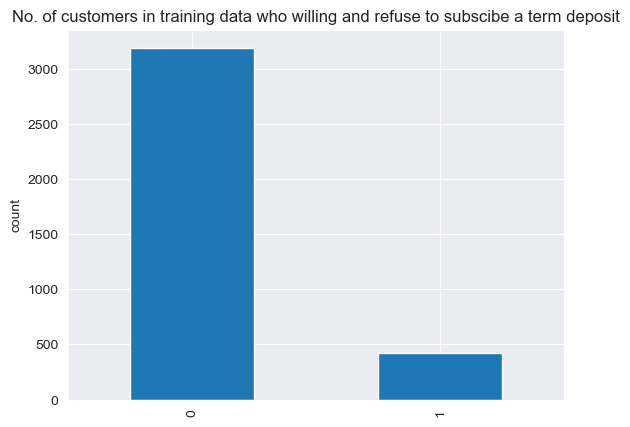

In [692]:
plt.figure()
y_train['target_output'].value_counts().plot(kind='bar')
plt.title('No. of customers in training data who willing and refuse to subscibe a term deposit')
plt.ylabel('count')
plt.show()

In [702]:
ros = RandomOverSampler()
X_train_resampled,y_train_resampled = ros.fit_resample(X_train,y_train)

In [703]:
y_train_resampled['target_output'].value_counts()

0    3193
1    3193
Name: target_output, dtype: int64

In [704]:
print('number of training samples before resampling:',len(y_train))
print('number of training samples after resampling:',len(y_train_resampled))

number of training samples before resampling: 3616
number of training samples after resampling: 6386


In [705]:
X_train_resampled

,duration,balance,age,day,month,campaign,pdays,poutcome_success
0,0.411960,-0.385690,-0.678021,0.495312,2.032374,-0.576829,-0.407218,0
1,-0.500182,0.307826,-0.867145,-0.232247,0.770871,0.709566,-0.407218,0
2,-0.746499,-0.115195,-0.678021,-0.959806,0.770871,-0.255231,-0.407218,0
3,1.512689,-0.420914,-0.961707,-0.353507,0.770871,1.352764,-0.407218,0
4,-0.180740,-0.387019,0.456727,1.344131,-0.490631,-0.576829,-0.407218,0
...,...,...,...,...,...,...,...,...
6381,0.254163,-0.028464,-0.678021,0.131532,2.452874,-0.255231,0.871375,1
6382,-0.161496,1.869981,-0.583458,-0.596026,0.770871,0.066368,1.420770,1
6383,1.724367,2.286688,3.671844,-0.838546,-0.070130,-0.576829,0.242067,0
6384,-0.534821,0.299851,-1.150832,-1.687365,-1.752133,-0.576829,-0.407218,0


In [706]:
X_test

,duration,balance,age,day,month,campaign,pdays,poutcome_success
2398,-0.542518,-1.164607,0.929538,1.465390,0.350371,1.031165,-0.407218,0
800,0.946930,0.484611,0.834976,-1.323585,0.770871,-0.255231,-0.377251,0
2288,-0.511728,-0.003542,0.834976,-1.202326,0.770871,0.066368,-0.407218,0
2344,-0.065279,-0.472753,-0.394334,-1.566105,-0.070130,3.282358,-0.407218,0
3615,0.304196,-0.221200,-0.961707,-1.566105,-1.752133,-0.255231,-0.407218,0
...,...,...,...,...,...,...,...,...
3589,0.327289,0.715561,-0.299771,1.101611,2.032374,-0.255231,1.430759,1
3128,-0.303898,-0.407954,1.496912,1.707910,0.350371,0.387967,-0.407218,0
3259,-0.427057,-0.330527,1.024100,1.707910,-0.490631,-0.576829,-0.407218,0
4239,-0.480939,0.293205,-0.961707,-1.444845,0.770871,-0.576829,-0.407218,0


# FEATURE SELECTION

In [ ]:
# Try 8 features from rondom forest

In [699]:
selected_rf_8 = ['duration','balance','age','day','month','campaign','pdays','poutcome_success']
x_selected_8 = data_x_normalized[selected_rf_8]
x_selected_8

,duration,balance,age,day,month,campaign,pdays,poutcome_success
0,-0.711861,0.121072,-1.056270,0.374052,1.611873,-0.576829,-0.407218,0
1,-0.169194,1.118644,-0.772583,-0.596026,-0.490631,-0.576829,2.989044,0
2,-0.303898,-0.024144,-0.583458,0.010273,-0.911131,-0.576829,2.899143,0
3,-0.250017,0.017726,-1.056270,-1.566105,-0.070130,0.387967,-0.407218,0
4,-0.146102,-0.472753,1.686036,-1.323585,-0.490631,-0.576829,-0.407218,0
...,...,...,...,...,...,...,...,...
4516,0.250315,-0.583410,-0.772583,1.707910,0.350371,0.709566,-0.407218,0
4517,-0.427057,-1.573671,1.496912,-0.838546,-0.490631,-0.576829,-0.407218,0
4518,-0.434754,-0.374724,1.496912,0.374052,0.770871,2.639160,-0.407218,0
4519,-0.519426,-0.094925,-1.245394,-1.202326,-1.752133,0.387967,1.710451,0


Logistic Regression score: 0.8287
[[681 126]
 [ 29  69]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       807
           1       0.35      0.70      0.47        98

    accuracy                           0.83       905
   macro avg       0.66      0.77      0.68       905
weighted avg       0.89      0.83      0.85       905

Decision Tree Classifier score: 0.8641
[[721  86]
 [ 37  61]]
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       807
           1       0.41      0.62      0.50        98

    accuracy                           0.86       905
   macro avg       0.68      0.76      0.71       905
weighted avg       0.89      0.86      0.88       905

Random Forest Classifier score: 0.8994
[[776  31]
 [ 60  38]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       807
           1       0.55      0.39      0.46        98

 

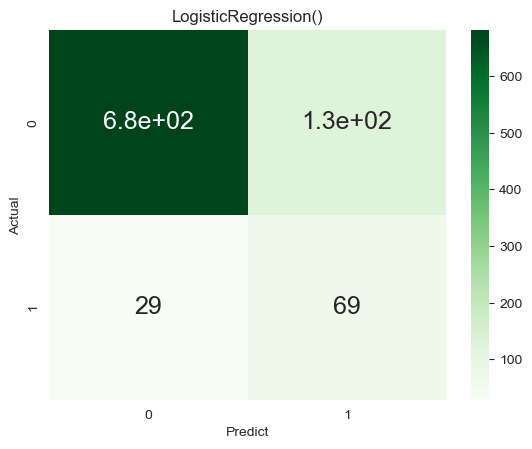

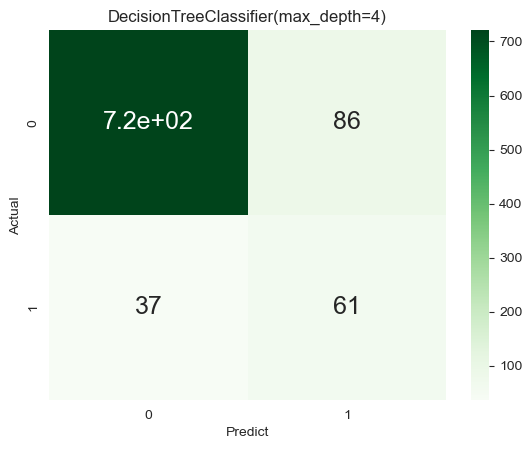

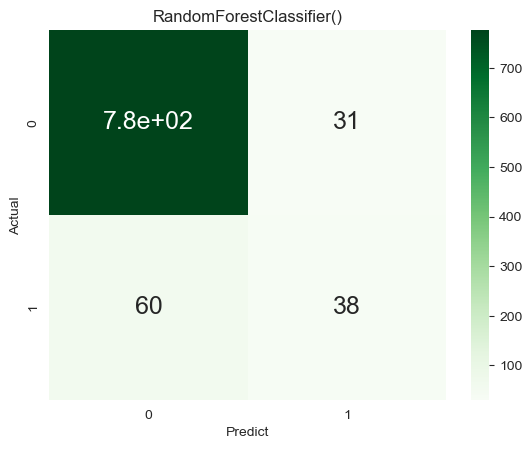

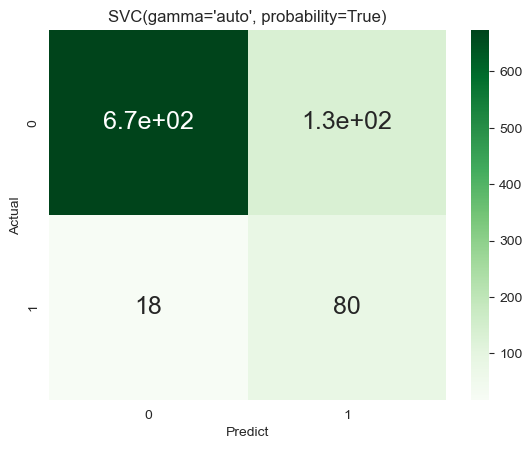

LogisticRegression()
accuracy:0.8983
precision:0.5682
recall:0.2551
F1 score:0.3521
specificity score:0.9765
1-specificity:0.0235
ROC-AUC score:0.6158

DecisionTreeClassifier(max_depth=4)
accuracy:0.9039
precision:0.5797
recall:0.4082
F1 score:0.4790
specificity score:0.9641
1-specificity:0.0359
ROC-AUC score:0.6861

RandomForestClassifier()
accuracy:0.8961
precision:0.5400
recall:0.2755
F1 score:0.3649
specificity score:0.9715
1-specificity:0.0285
ROC-AUC score:0.6235

SVC(gamma='auto', probability=True)
accuracy:0.8983
precision:0.5714
recall:0.2449
F1 score:0.3429
specificity score:0.9777
1-specificity:0.0223
ROC-AUC score:0.6113



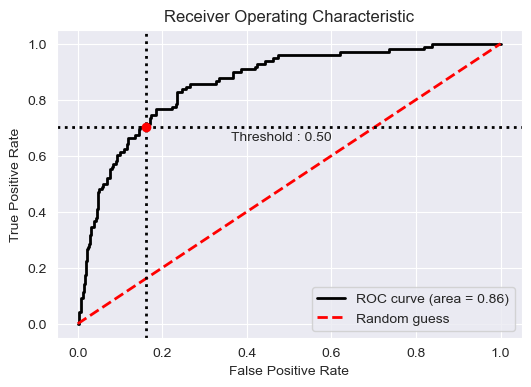

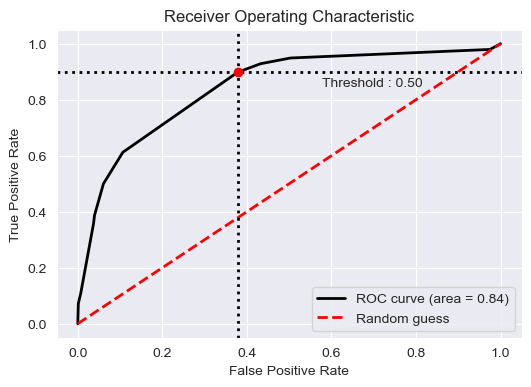

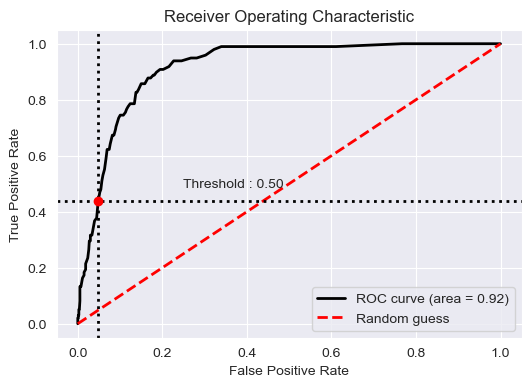

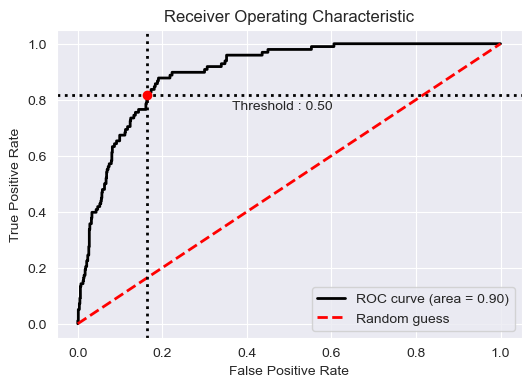

best score = [0.8994475138121547, 'Random Forest Classifier']

COMPARING ACCURACY


[[0.8287292817679558, 'Logistic Regression'],
 [0.8640883977900552, 'Decision Tree Classifier'],
 [0.8994475138121547, 'Random Forest Classifier'],
 [0.8320441988950277, 'Support Vector Machine']]

In [707]:
algo=[
    [LogisticRegression(), 'Logistic Regression'], 
    [DecisionTreeClassifier(max_depth = 4), 'Decision Tree Classifier'],
    [RandomForestClassifier(), 'Random Forest Classifier'],
    [SVC(gamma='auto',probability=True),'Support Vector Machine']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train_resampled, y_train_resampled)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]} score: {score:.04f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
for a in algo:
    model = a[0]
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Greens',annot_kws={"size": 18},)
    plt.title(model)
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()    
for i in algo:
    model = i[0]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(cal_result(y_test,y_pred))

for i in algo:
    model = i[0]
    model.fit(X_train_resampled,y_train_resampled)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    bc = BinaryClassification(y_test, y_pred_prob, labels=["Class 1", "Class 2"])
    plt.figure(figsize=(6,4)) 
    bc.plot_roc_curve() 
    plt.show()
    

print(f'best score = {max(model_scores)}')
print('')
print('COMPARING ACCURACY')
model_scores


In [672]:
X_train_resampled

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,-0.678021,-0.385690,0.495312,2.032374,0.411960,-0.576829,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
1,-0.867145,0.307826,-0.232247,0.770871,-0.500182,0.709566,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
2,-0.678021,-0.115195,-0.959806,0.770871,-0.746499,-0.255231,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
3,-0.961707,-0.420914,-0.353507,0.770871,1.512689,1.352764,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
4,0.456727,-0.387019,1.344131,-0.490631,-0.180740,-0.576829,-0.407218,-0.320413,0,1,...,1,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6381,-0.299771,-0.416261,0.252792,-0.490631,0.685218,-0.576829,-0.407218,-0.320413,0,0,...,1,1,0,1,0,0,0,0,0,1
6382,-0.299771,-0.472753,-0.596026,1.191372,-0.015246,0.066368,0.551726,1.451197,0,0,...,0,1,0,1,0,0,0,0,1,0
6383,-0.961707,-0.337838,-1.444845,-1.752133,1.816736,-0.576829,-0.407218,-0.320413,0,0,...,0,1,0,1,0,0,0,0,0,1
6384,0.645851,-0.084956,-1.808625,-0.070130,0.000149,-0.576829,-0.407218,-0.320413,0,0,...,1,0,1,1,0,0,0,0,0,1


### Feature Importance (Random Forest)

In [517]:
# Random Forest 
random_forest = RandomForestClassifier(n_estimators=250, random_state=42)
random_forest.fit(X_train_resampled,y_train_resampled)

rf_importance_features = pd.DataFrame({'Feature':data_x.columns,'Importance':random_forest.feature_importances_})
rf_importance_features = rf_importance_features.sort_values(by=['Importance'],ascending=False)
rf_importance_features 

,Feature,Importance
4,duration,0.337723
1,balance,0.086986
0,age,0.078354
2,day,0.071092
3,month,0.069600
5,campaign,0.037059
6,pdays,0.030505
38,poutcome_success,0.028554
35,contact_unknown,0.020798
7,previous,0.020098


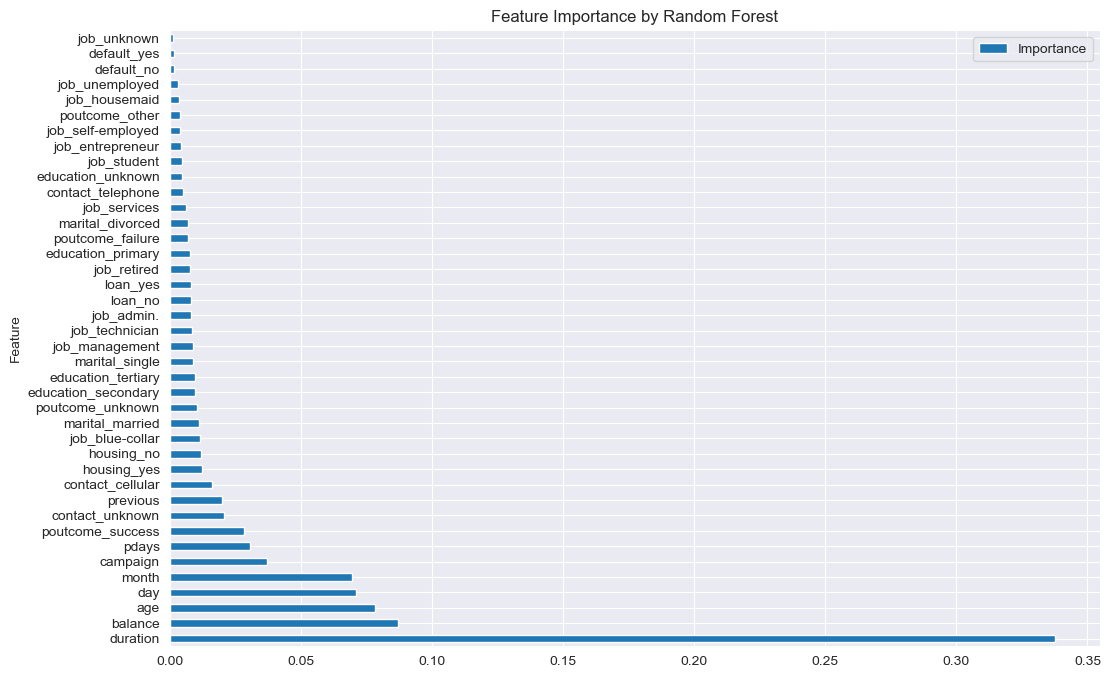

In [521]:
rf_importance_features.plot(x='Feature',y='Importance',kind='barh',figsize=(12,8))
plt.title('Feature Importance by Random Forest')
plt.show()

## Before Feature Selection (no resample) 

In [667]:
def cal_result(y_test,y_pred):
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = specificity_score(y_test,y_pred)
    ROC_AUC = roc_auc_score(y_test,y_pred)

    print('accuracy:%.4f'%accuracy)
    print('precision:%.4f'%precision)
    print('recall:%.4f'%recall)
    print('F1 score:%.4f'%f1_score)
    print('specificity score:%.4f'%specificity)
    print('1-specificity:%.4f'%(1-specificity))
    print('ROC-AUC score:%.4f'%ROC_AUC)
    
    return('')

LogisticRegression score: 0.9006
[[789  18]
 [ 72  26]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       807
           1       0.59      0.27      0.37        98

    accuracy                           0.90       905
   macro avg       0.75      0.62      0.66       905
weighted avg       0.88      0.90      0.88       905

DecisionTreeClassifier score: 0.8994
[[781  26]
 [ 65  33]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       807
           1       0.56      0.34      0.42        98

    accuracy                           0.90       905
   macro avg       0.74      0.65      0.68       905
weighted avg       0.88      0.90      0.89       905

RandomForestClassifier score: 0.9028
[[793  14]
 [ 74  24]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       807
           1       0.63      0.24      0.35        98

    ac

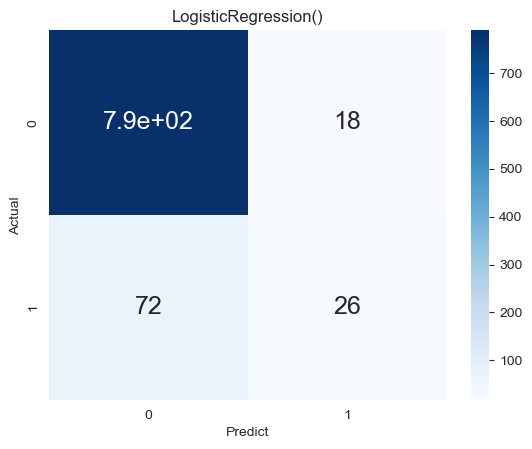

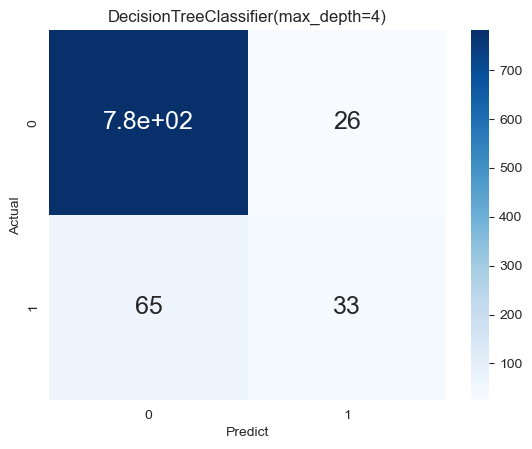

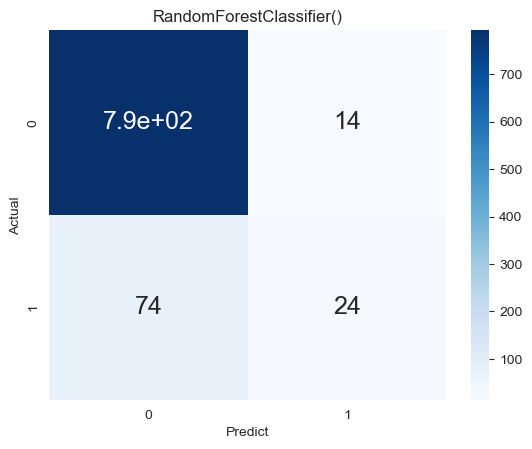

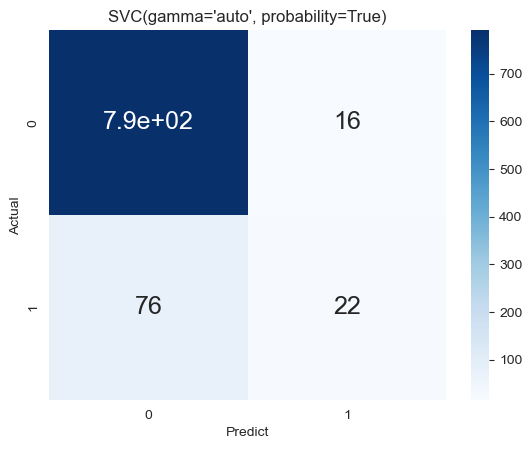

LogisticRegression()
accuracy:0.9006
precision:0.5909
recall:0.2653
F1 score:0.3662
specificity score:0.9777
1-specificity:0.0223
ROC-AUC score:0.6215

DecisionTreeClassifier(max_depth=4)
accuracy:0.8994
precision:0.5593
recall:0.3367
F1 score:0.4204
specificity score:0.9678
1-specificity:0.0322
ROC-AUC score:0.6523

RandomForestClassifier()
accuracy:0.8972
precision:0.5581
recall:0.2449
F1 score:0.3404
specificity score:0.9765
1-specificity:0.0235
ROC-AUC score:0.6107

SVC(gamma='auto', probability=True)
accuracy:0.8983
precision:0.5789
recall:0.2245
F1 score:0.3235
specificity score:0.9802
1-specificity:0.0198
ROC-AUC score:0.6023



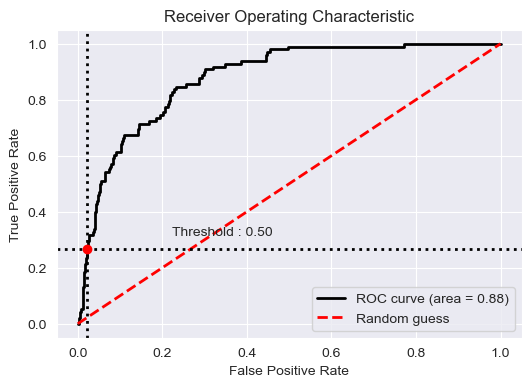

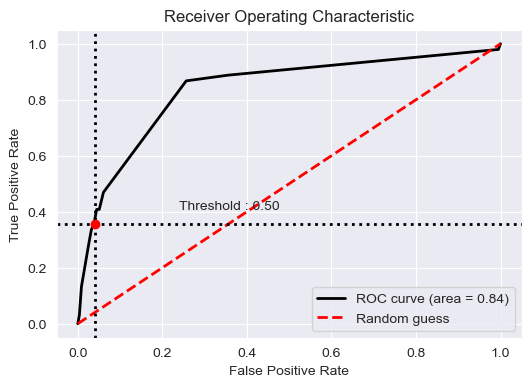

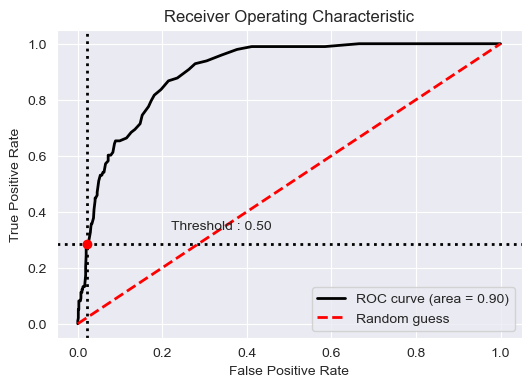

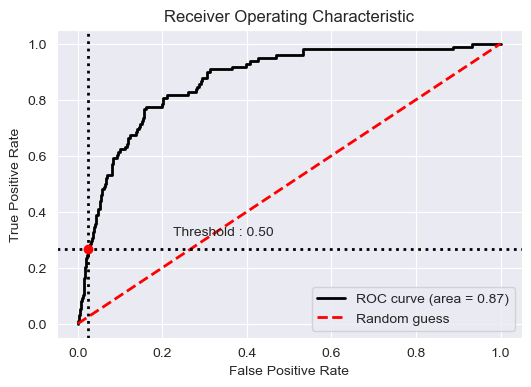

best score = [0.9027624309392265, 'RandomForestClassifier']

COMPARING ACCURACY


[[0.9005524861878453, 'LogisticRegression'],
 [0.8994475138121547, 'DecisionTreeClassifier'],
 [0.9027624309392265, 'RandomForestClassifier'],
 [0.8983425414364641, 'Support Vector Machine']]

In [673]:
algo=[
    [LogisticRegression(), 'LogisticRegression'], 
    [DecisionTreeClassifier(max_depth = 4), 'DecisionTreeClassifier'],
    [RandomForestClassifier(), 'RandomForestClassifier'],
    [SVC(gamma='auto',probability=True),'Support Vector Machine']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train, y_train)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]} score: {score:.04f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
for a in algo:
    model = a[0]
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',annot_kws={"size": 18},)
    plt.title(model)
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()    
for i in algo:
    model = i[0]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(cal_result(y_test,y_pred))

for i in algo:
    model = i[0]
    model.fit(X_train,y_train)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    bc = BinaryClassification(y_test, y_pred_prob, labels=["Class 1", "Class 2"])
    plt.figure(figsize=(6,4)) 
    bc.plot_roc_curve() 
    plt.show()

print(f'best score = {max(model_scores)}')
print('')
print('COMPARING ACCURACY')
model_scores

In [674]:
print('COMPARING SCORE without Oversampling')
model_scores

COMPARING SCORE without Oversampling


[[0.9005524861878453, 'LogisticRegression'],
 [0.8994475138121547, 'DecisionTreeClassifier'],
 [0.9027624309392265, 'RandomForestClassifier'],
 [0.8983425414364641, 'Support Vector Machine']]

# ROC Curves 

### Before feature selection Model Test with Oversampling data

Logistic Regression score: 0.8155
[[665 142]
 [ 25  73]]
              precision    recall  f1-score   support

           0       0.96      0.82      0.89       807
           1       0.34      0.74      0.47        98

    accuracy                           0.82       905
   macro avg       0.65      0.78      0.68       905
weighted avg       0.90      0.82      0.84       905

Decision Tree Classifier score: 0.7127
[[555 252]
 [  8  90]]
              precision    recall  f1-score   support

           0       0.99      0.69      0.81       807
           1       0.26      0.92      0.41        98

    accuracy                           0.71       905
   macro avg       0.62      0.80      0.61       905
weighted avg       0.91      0.71      0.77       905

Random Forest Classifier score: 0.9028
[[784  23]
 [ 65  33]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95       807
           1       0.59      0.34      0.43        98

 

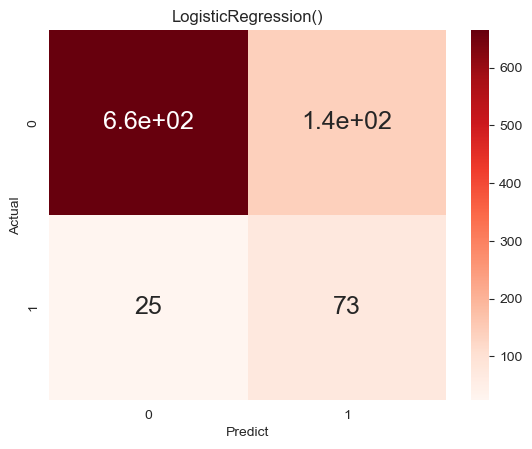

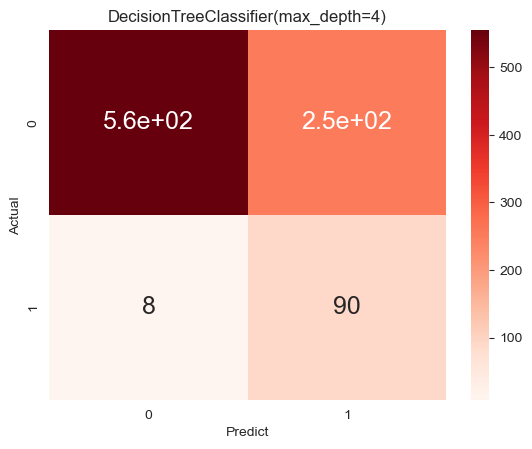

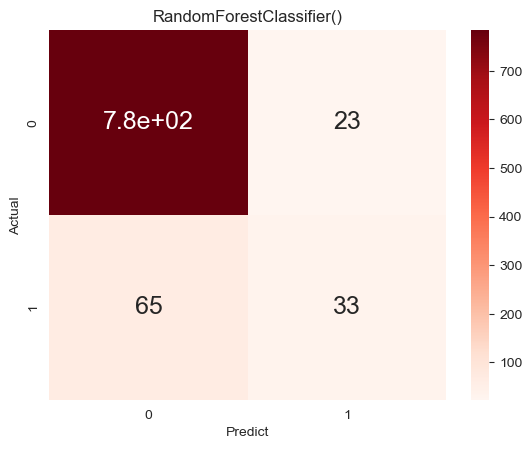

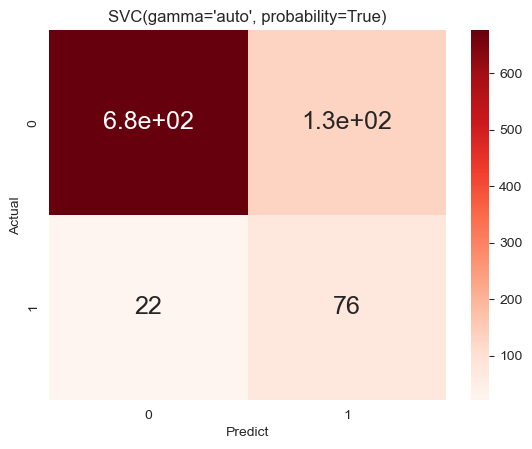

LogisticRegression()
accuracy:0.8155
precision:0.3395
recall:0.7449
F1 score:0.4665
specificity score:0.8240
1-specificity:0.1760
ROC-AUC score:0.7845

DecisionTreeClassifier(max_depth=4)
accuracy:0.7127
precision:0.2632
recall:0.9184
F1 score:0.4091
specificity score:0.6877
1-specificity:0.3123
ROC-AUC score:0.8030

RandomForestClassifier()
accuracy:0.8961
precision:0.5345
recall:0.3163
F1 score:0.3974
specificity score:0.9665
1-specificity:0.0335
ROC-AUC score:0.6414

SVC(gamma='auto', probability=True)
accuracy:0.8309
precision:0.3671
recall:0.7755
F1 score:0.4984
specificity score:0.8377
1-specificity:0.1623
ROC-AUC score:0.8066



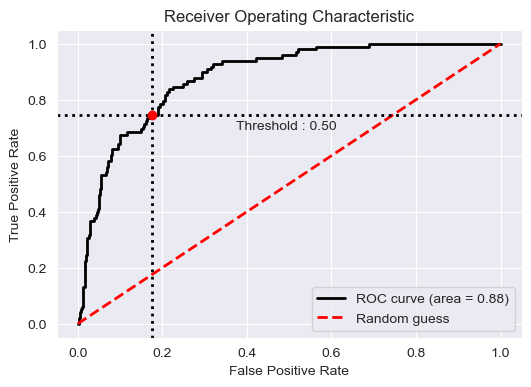

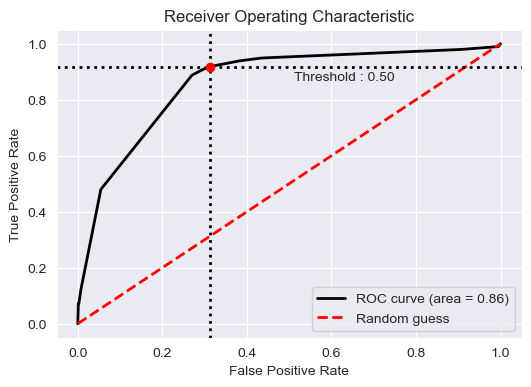

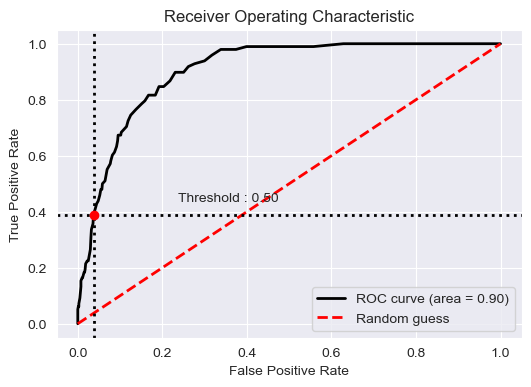

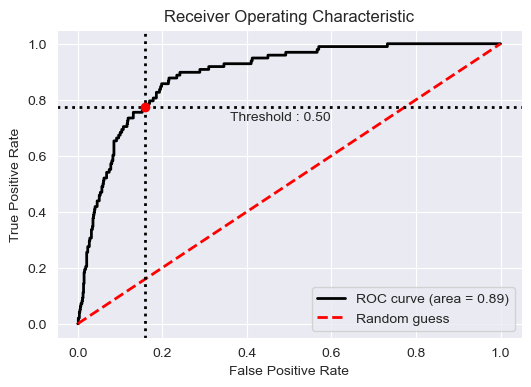

best score = [0.9027624309392265, 'Random Forest Classifier']

COMPARING ACCURACY


[[0.8154696132596685, 'Logistic Regression'],
 [0.712707182320442, 'Decision Tree Classifier'],
 [0.9027624309392265, 'Random Forest Classifier'],
 [0.830939226519337, 'Support Vector Machine']]

In [675]:
algo=[
    [LogisticRegression(), 'Logistic Regression'], 
    [DecisionTreeClassifier(max_depth = 4), 'Decision Tree Classifier'],
    [RandomForestClassifier(), 'Random Forest Classifier'],
    [SVC(gamma='auto',probability=True),'Support Vector Machine']
]
model_scores=[]
for a in algo:
    model = a[0]
    model.fit(X_train_resampled, y_train_resampled)
    score=model.score(X_test, y_test)
    model_scores.append([score, a[1]])
    y_pred=model.predict(X_test)
    print(f'{a[1]} score: {score:.04f}')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
for a in algo:
    model = a[0]
    y_pred=model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Reds',annot_kws={"size": 18},)
    plt.title(model)
    plt.xlabel('Predict')
    plt.ylabel('Actual')
    plt.show()    
for i in algo:
    model = i[0]
    model.fit(X_train_resampled,y_train_resampled)
    y_pred = model.predict(X_test)
    print(model)
    print(cal_result(y_test,y_pred))
    
for i in algo:
    model = i[0]
    model.fit(X_train_resampled,y_train_resampled)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    bc = BinaryClassification(y_test, y_pred_prob, labels=["Class 1", "Class 2"])
    plt.figure(figsize=(6,4)) 
    bc.plot_roc_curve() 
    plt.show()
    

print(f'best score = {max(model_scores)}')
print('')
print('COMPARING ACCURACY')
model_scores

